## Uso de Transfer Learning

Anteriormente implementamos una arquitectura basada en AlexNet, pero ¿qué sucede si no tenemos los recursos suficientes o datos para realizar un entrenamiento desde cero?  El uso de Transfer Learning o uso de modelo pre entrenados para construir nuestros propios modelos, representan una forma de enfrentar la carencia de datos o del poder de cómputo.

Veamos un ejemplo de cómo utilizar un modelo preentrenado VGG16 y modifiquemos la forma del tensor de entrada y salida del modelo. En particular, modifiquemos el modelo para que el tensor de entrada sea: (128, 128, 3) y la salida sean cuatro regresiones.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Model
import tensorflow.keras as keras

In [ ]:
input_tensor = Input(shape=(128, 128, 3))

# No incluiremos las últimas tres capas FC del clasificador
vgg16 = VGG16(weights="imagenet", include_top=False, input_tensor=input_tensor)

vgg16.trainable = False            # No queremos continuar entrenando los pesos de VGG16
output_vgg16 = vgg16.output        # Hacemos referencia al tensor de salida de VGG16

# Ahora agreguemos algunas capas y concluyamos con las regresión

# Regresión (4 valores reales)
x_tensor = Flatten()(output_vgg16)
x_tensor = Dense(25, activation="relu")(x_tensor)
x_tensor = Dense(10, activation="relu")(x_tensor)
output_tensor = Dense(4, name = "output")(x_tensor)


In [ ]:
myVGG16 = Model(inputs=input_tensor, outputs=output_tensor)

# Veamos el resumen del modelo
myVGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

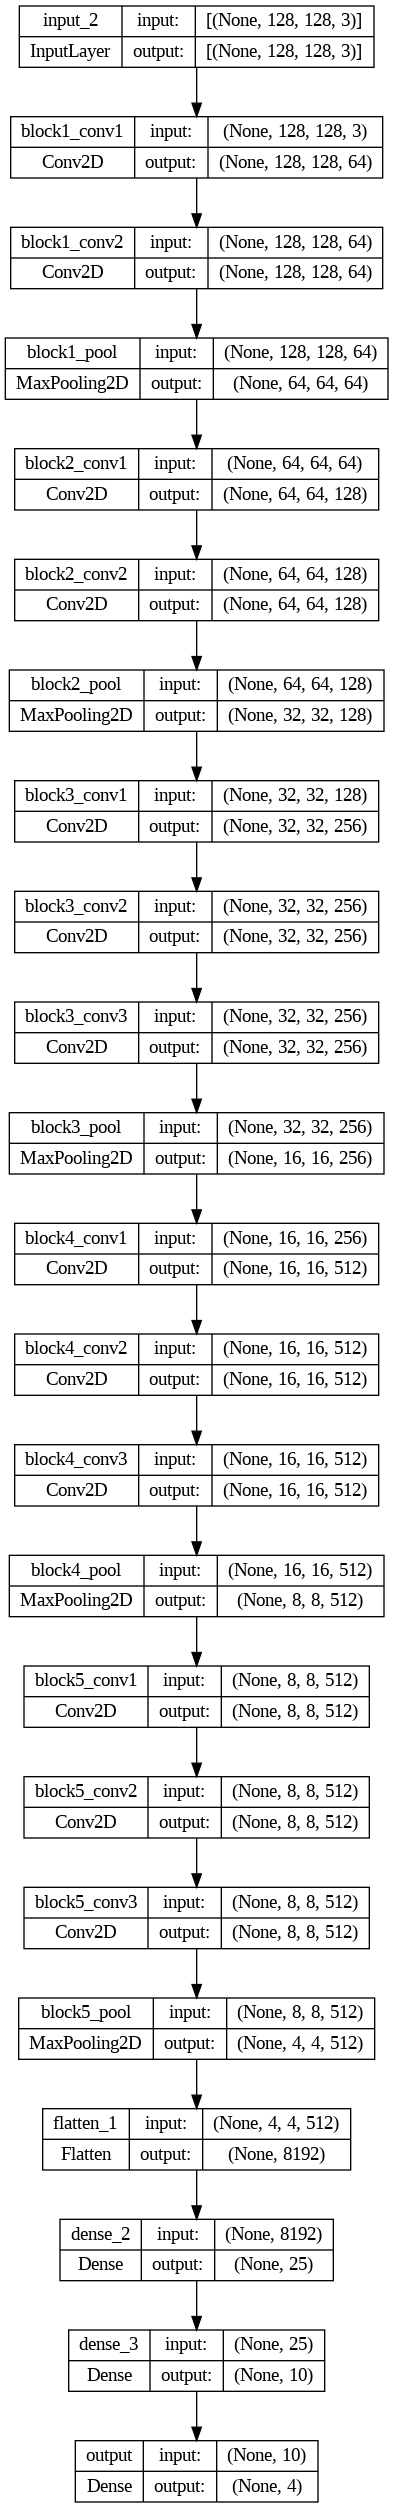

In [ ]:
keras.utils.plot_model(myVGG16, "VGG16-R4.png", show_shapes=True)